In [122]:
#importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline




In [123]:
#reading data
data=pd.read_csv('winequality-white.csv',sep=';')

CHECKING FEATURE TYPES AND GENERAL STATISTICS

In [124]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [125]:
data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [126]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


All the features are numerical but there is high variance among some of the variables like residual sugar, free sulphur dioxide and total sulphur dioxide. There is a high chance of outliers being present in these features. Following are the distribution plots of these features

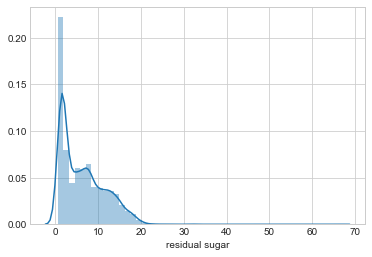

In [127]:
sns.distplot(data['residual sugar'])



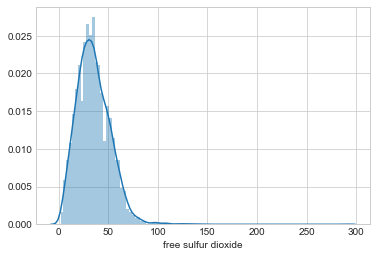

In [128]:
sns.distplot(data['free sulfur dioxide'],bins=100)

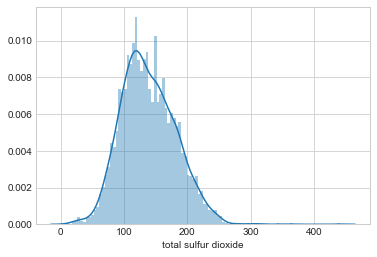

In [129]:
sns.distplot(data['total sulfur dioxide'],bins=100)

Examining the correlation matrix we find that that alcohol has a significant correlation with quality and furthur alcohol has significant correlations with residual sugar, density. we can explore these relations to eliminate some outliers if possible since some classes have a lot more data points than others and they might have high probability of containing outliers.

In [130]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


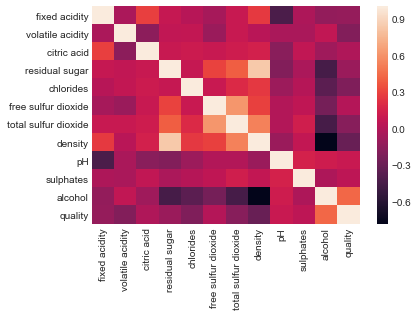

In [131]:
sns.heatmap(data.corr())

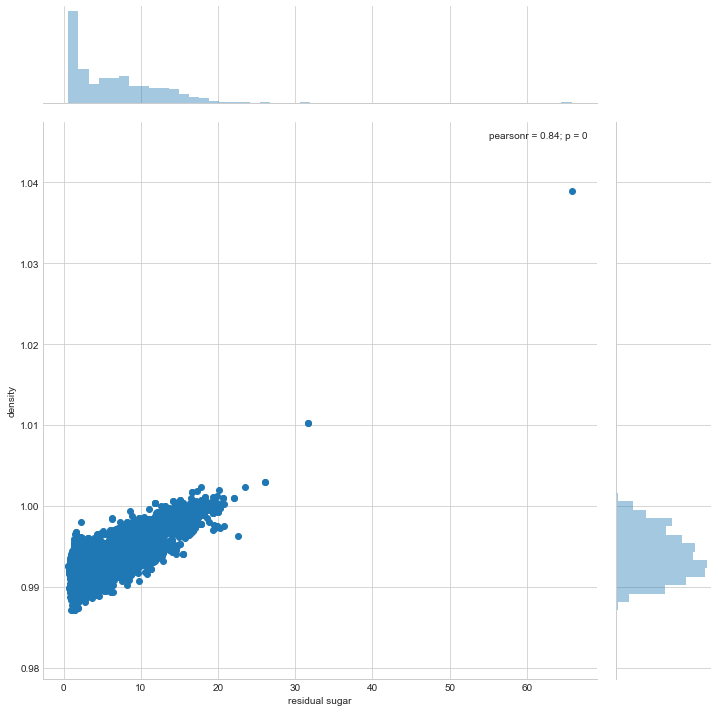

In [132]:
sns.set_style(style='whitegrid')
sns.jointplot(x='residual sugar',y='density',data=data,size=10)

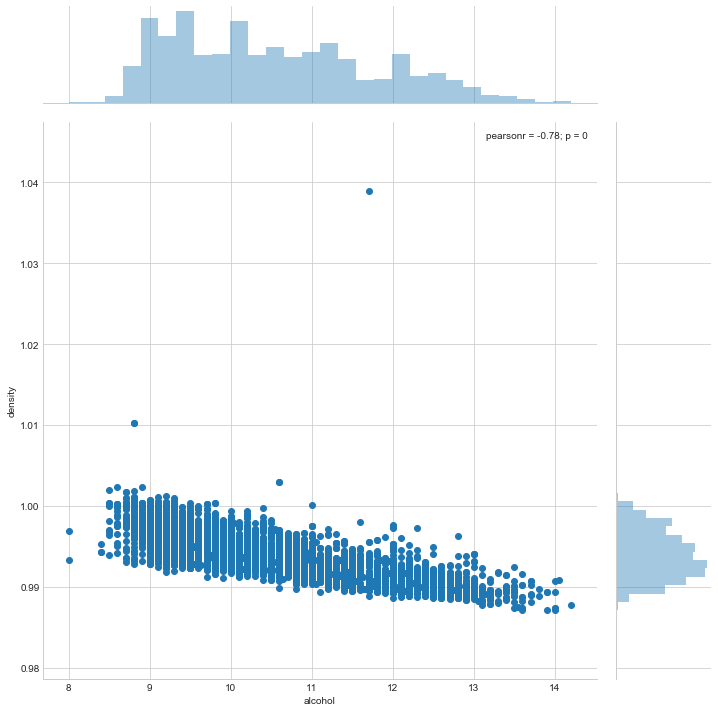

In [133]:
sns.jointplot(x='alcohol',y='density',data=data,size=10)

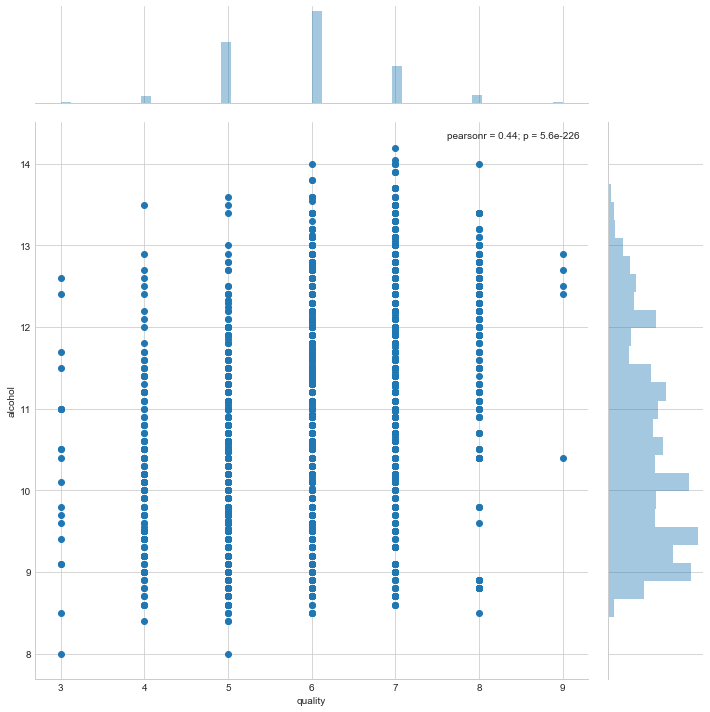

In [134]:
sns.jointplot(x='quality',y='alcohol',data=data,size=10)

If we observe the following box plot, we observe that alcohol content of 11-13 is apt for a high quality wine but then we have some data points in the 5th class with the same values. These data points can actually reduce the recall of our model as it can classify these data points to a high quality class. So this 5th class points falling in this range need to get eliminated.

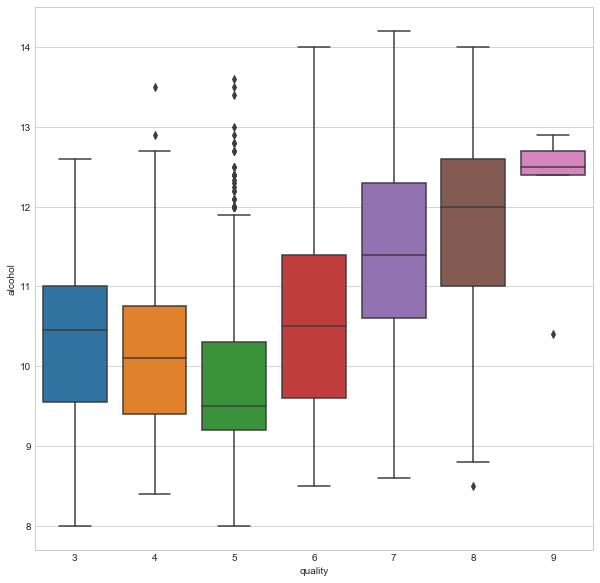

In [135]:
plt.figure(figsize=(10,10))
sns.boxplot(x='quality',y='alcohol',data=data)



In [136]:
data1=data[data['quality']==5][data['alcohol']>=11]
a=data1.index.values
data=data.drop(a)

C:\Users\kahlo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


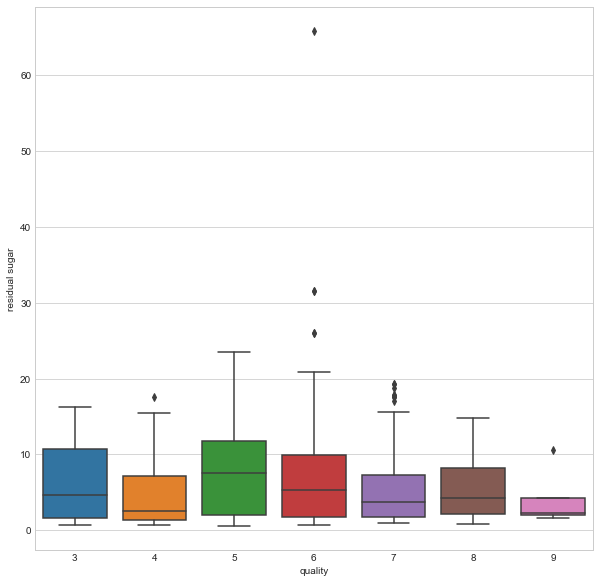

In [138]:
plt.figure(figsize=(10,10))
sns.boxplot(x='quality',y='residual sugar',data=data)

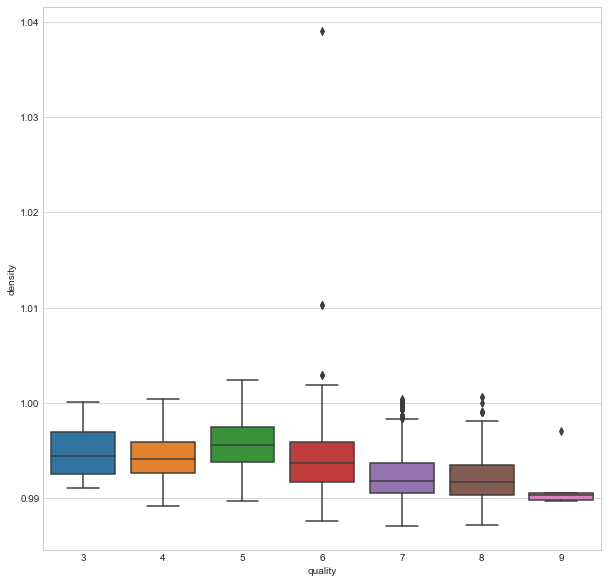

In [139]:
plt.figure(figsize=(10,10))
sns.boxplot(x='quality',y='density',data=data)

our overall aim regarding this business problem is to obtain a good recall score for low quality wines so that they are not classified as high quality wines(false negitives). if high quality wines are classified as low quality, still we can bear the fact they will undergo furthur testing to get approved.
Following this lets club these quality scores into three clases since learning among minute differences will be chalenging for any algorithm. we can manipulate the classes as long as our final business perspective is served which is detecting actual low quality and avergage quality wines.

lets make three classes 1:bad, 2:average, 3: excellent and put quality numbers 3 and 4 in 1, (5,6,7) in 2 and (8,9) in 3

In [141]:
reviews = []
for i in data['quality']:
    if i >= 3 and i<=4:
        reviews.append('1')
    elif i >= 5 and i <= 7:
        reviews.append('2')
    elif i >= 8 and i <= 9:
        reviews.append('3')
data['Reviews'] = reviews

In [144]:
#splitting the data
x=data.drop(['quality','Reviews'],axis=1)
y=data['Reviews']

In [149]:
y.value_counts()

2    4380
1     183
3     180
Name: Reviews, dtype: int64

Since there is class imbalance, we will use smote for over sampling

In [150]:
from imblearn.over_sampling import SMOTE 
x_smote,y_smote=SMOTE(random_state=50,k_neighbors=4).fit_sample(x,data['Reviews'])

In [152]:
#stadardizing the features as range is very diverse
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_smote = sc.fit_transform(x_smote)

In [153]:
#importing and applying Principal Component Analysis
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(x_smote)

To Identify how many components actually explain the variance of the data, see the graph below which shows that more han 90% of the variance is explained by 9 components. So we select first 9 components for our principal component analysis.

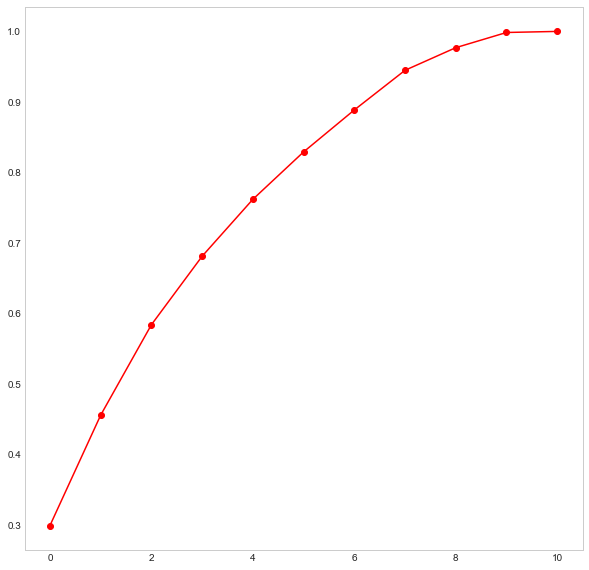

In [154]:
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.grid()

In [210]:
pca_new = PCA(n_components=9)
x_new = pca_new.fit_transform(x_smote)

In [211]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_new,y_smote, test_size=0.33, random_state=101)

In [212]:
#fitting random forest classifier
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [213]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [214]:
#cross validation score for 10 folds
scores=cross_val_score(rf,X_train,y_train,cv=10)
scores.mean()

0.9253627203285907

In [215]:
#prediction on the test set
prediction1=rf.predict(X_test)


In [216]:
#importing performance metrics
from sklearn import metrics
from sklearn.model_selection import cross_val_score

Following metrics shows that we have been successfull in classifying bad quality wines with a recall of 97%. The biggest concern in this business problem is to capture bad quality wines from getting classified as excellent which we have achieved in this classification. Only 2 bad quality wines are classified to excellent.

Also excellent wines have been classified to average and very less(3 to be precise) to bad quality which is a decent result. Also this could be rectified if furthur testing is done on wines. This may be due to some wrong record.

In [217]:
print(metrics.classification_report(y_test,prediction1))
print(metrics.confusion_matrix(y_test,prediction1))

             precision    recall  f1-score   support

          1       0.93      0.97      0.95      1423
          2       0.93      0.87      0.90      1437
          3       0.95      0.96      0.95      1477

avg / total       0.93      0.93      0.93      4337

[[1380   40    3]
 [ 108 1254   75]
 [   3   55 1419]]


In [218]:
#overall accuracy
print(metrics.accuracy_score(y_test,prediction1))

0.9345169471985243


In [192]:
#xgboost and svc on this data
import xgboost as xgb
xg1=xgb.XGBClassifier()
xg1.fit(X_train,y_train)
prediction2=xg1.predict(X_test)
print(metrics.classification_report(y_test,prediction2))
print(metrics.confusion_matrix(y_test,prediction2))

             precision    recall  f1-score   support

          1       0.84      0.83      0.84      1423
          2       0.74      0.64      0.69      1437
          3       0.78      0.90      0.84      1477

avg / total       0.79      0.79      0.79      4337

[[1187  191   45]
 [ 198  919  320]
 [  22  128 1327]]


In [191]:
sv=SVC()
sv.fit(X_train,y_train)
prediction2=sv.predict(X_test)
print(metrics.classification_report(y_test,prediction2))
print(metrics.confusion_matrix(y_test,prediction2))

             precision    recall  f1-score   support

          1       0.86      0.92      0.89      1423
          2       0.85      0.65      0.74      1437
          3       0.81      0.94      0.87      1477

avg / total       0.84      0.84      0.83      4337

[[1306  108    9]
 [ 181  941  315]
 [  24   58 1395]]


As we saw neither the xgboost or SVC was able to outperform the random forest.
This is due to the reason that this data set had manu outliers and random forest algorithm is apt for dealing with outliers and correlation problem. Overall accuracy of 93% was achieved along with an impressive recall score of 97%, 87% and 96% for the bad, average and excellent qualities.
